# 네이버 뉴스 데이터 가져오기

> 1. 네이버 오픈 API로 기사 URL 크롤링
> 2. bs4 + selenium으로 기사 제목 및 내용 크롤링

- https://developers.naver.com/products/service-api/search/search.md 
오픈 API 이용 신청 클릭하기

-  https://developers.naver.com/docs/serviceapi/search/blog/blog.md#%EB%B8%94%EB%A1%9C%EA%B7%B8 에서
 네이버 검색 Open API 예제 (python) 볼수 있음

In [1]:
import os
import sys
import urllib.request
import requests

client_id = "7Rw0IMw6pollWxMoWmep"
client_secret = "MA_4fslk3O" # 발급받은 client_secret
encText = urllib.parse.quote("네이버")#url에 파이썬 글자 붙여줌


url = "https://openapi.naver.com/v1/search/news?query=" + encText # json 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과


request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request) #접속 하게끔 해줌
rescode = response.getcode() #request를 response 코드로 전달 

#200 나오면 정상임
if(rescode==200):
    response_body = response.read()
#     result = requests.get(response.geturl(),
#                           headers={"X-Naver-Client-Id":client_id,
#                                    "X-Naver-Client-Secret":client_secret}
#                          )
#     news_data.append(result.json())
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
"lastBuildDate": "Thu, 03 Jun 2021 13:20:51 +0900",
"total": 3164334,
"start": 1,
"display": 10,
"items": [
{
"title": "'알고있지만' 한소희x송강, 설렘 포텐 터지는 케미! 붙어만 있어도 심쿵♥",
"originallink": "http://www.osen.co.kr/article/G1111592396",
"link": "https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=109&aid=0004417589",
"description": "원작 <b>네이버</b>웹툰 ‘알고있지만’(작가 정서)) 측은 3일, 설렘 포텐을 제대로 터뜨린 포스터 촬영현장 메이킹... 동명의 인기 <b>네이버</b>웹툰을 원작으로 하는 ‘알고있지만,’은 사랑은 못 믿어도 연애는 하고 싶은 여자... ",
"pubDate": "Thu, 03 Jun 2021 13:19:00 +0900"

},
{
"title": "'잡동산' 승관, '랜덤 홈쇼핑' 준비...어린이 고객 만족도 100%",
"originallink": "http://www.slist.kr/news/articleView.html?idxno=256469",
"link": "http://www.slist.kr/news/articleView.html?idxno=256469",
"description": "사진=채널S '잡동산' 제공 3일 방송되는 채널S '잡동산' 측은 승관이 준비한 '랜덤 홈쇼핑'에서 노련한 진행 실력을 뽐내는 어린이 고객님의 활약을 담은 영상을 <b>네이버</b>TV 공식 채널을 통해 선공개했다. '잡동산'의 9번째 잡... ",
"pubDate": "Thu, 03 Jun 2021 13:18:00 +0900"

},
{
"title": "일동후디스, 필수 영양소로 채운 '하이뮨 프로틴 밸런스 음료' 출시",
"originallink": "http:

In [2]:
import os
import sys
import urllib.request
import requests

news_data = []

client_id = "7Rw0IMw6pollWxMoWmep"
client_secret = "MA_4fslk3O" # 발급받은 client_secret
encText = urllib.parse.quote("네이버")#url에 파이썬 글자 붙여줌
url = "https://openapi.naver.com/v1/search/news?query=" + encText # json 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과


request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request) #접속 하게끔 해줌
rescode = response.getcode() #request를 response 코드로 전달 

#200 나오면 정상임
if(rescode==200):
#    response_body = response.read()
    result = requests.get(response.geturl(),
                          headers={"X-Naver-Client-Id":client_id,
                                   "X-Naver-Client-Secret":client_secret}
                         )
    news_data.append(result.json()) # 키 , 값 형태인 json 형태로 만들기
#    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

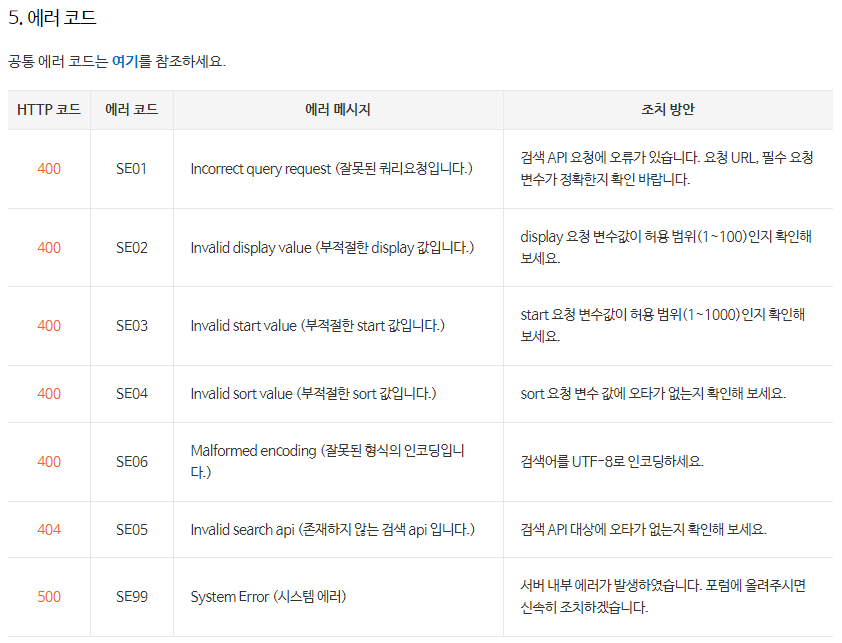

In [3]:
# 먼저 패키지를 설치하고

#  !pip install IPython 
from IPython.display import Image  # 주피터 노트북에 이미지 삽입


Image("navererror.png")

In [4]:
naver_news_link = []

for page in news_data:
    #print(page)
    page_news_link = []
    
    for item in page['items']:
        #print(item)
        temp_link = item['link']
        #print(temp_link)
        if "naver" in temp_link:
            page_news_link.append(temp_link)
    
    naver_news_link.append(page_news_link)
        

# 사이트 확인하기에 편한 코드 구조.
for page in naver_news_link:
    for link in page:
        print(link)

https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=109&aid=0004417589
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=092&aid=0002223965
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=112&aid=0003440732
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=422&aid=0000488191


### 네이버 OPEN API를 통해 가져온 데이터 확인하기.

In [5]:
news_data

[{'lastBuildDate': 'Thu, 03 Jun 2021 13:20:51 +0900',
  'total': 3164334,
  'start': 1,
  'display': 10,
  'items': [{'title': "'알고있지만' 한소희x송강, 설렘 포텐 터지는 케미! 붙어만 있어도 심쿵♥",
    'originallink': 'http://www.osen.co.kr/article/G1111592396',
    'link': 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=109&aid=0004417589',
    'description': '원작 <b>네이버</b>웹툰 ‘알고있지만’(작가 정서)) 측은 3일, 설렘 포텐을 제대로 터뜨린 포스터 촬영현장 메이킹... 동명의 인기 <b>네이버</b>웹툰을 원작으로 하는 ‘알고있지만,’은 사랑은 못 믿어도 연애는 하고 싶은 여자... ',
    'pubDate': 'Thu, 03 Jun 2021 13:19:00 +0900'},
   {'title': '“상쾌한 민트와 카카오의 시원한 만남” 오리온, 여름 한정판 초코파이하우스...',
    'originallink': 'http://theviewers.co.kr/View.aspx?No=1658068',
    'link': 'http://theviewers.co.kr/View.aspx?No=1658068',
    'description': '현재 전국의 편의점 냉장 코너를 비롯해 도곡본점, 압구정점 등 초코파이하우스 매장과 이커머스 채널 ‘<b>네이버</b> 스마트스토어 오리온 직영몰’, ‘쿠팡’, ‘마켓컬리’, ‘헬로네이처’ 등에서 판매 중이다. 오리온... ',
    'pubDate': 'Thu, 03 Jun 2021 13:18:00 +0900'},
   {'title': "일동후디스, 필수 영양소로 채운 '하이뮨 프로틴 밸런스 음료' 출시",
    'origin

In [6]:
news_data[0]

{'lastBuildDate': 'Thu, 03 Jun 2021 13:20:51 +0900',
 'total': 3164334,
 'start': 1,
 'display': 10,
 'items': [{'title': "'알고있지만' 한소희x송강, 설렘 포텐 터지는 케미! 붙어만 있어도 심쿵♥",
   'originallink': 'http://www.osen.co.kr/article/G1111592396',
   'link': 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=109&aid=0004417589',
   'description': '원작 <b>네이버</b>웹툰 ‘알고있지만’(작가 정서)) 측은 3일, 설렘 포텐을 제대로 터뜨린 포스터 촬영현장 메이킹... 동명의 인기 <b>네이버</b>웹툰을 원작으로 하는 ‘알고있지만,’은 사랑은 못 믿어도 연애는 하고 싶은 여자... ',
   'pubDate': 'Thu, 03 Jun 2021 13:19:00 +0900'},
  {'title': '“상쾌한 민트와 카카오의 시원한 만남” 오리온, 여름 한정판 초코파이하우스...',
   'originallink': 'http://theviewers.co.kr/View.aspx?No=1658068',
   'link': 'http://theviewers.co.kr/View.aspx?No=1658068',
   'description': '현재 전국의 편의점 냉장 코너를 비롯해 도곡본점, 압구정점 등 초코파이하우스 매장과 이커머스 채널 ‘<b>네이버</b> 스마트스토어 오리온 직영몰’, ‘쿠팡’, ‘마켓컬리’, ‘헬로네이처’ 등에서 판매 중이다. 오리온... ',
   'pubDate': 'Thu, 03 Jun 2021 13:18:00 +0900'},
  {'title': "일동후디스, 필수 영양소로 채운 '하이뮨 프로틴 밸런스 음료' 출시",
   'originallink': 'http:/

### 가져온 URL이 네이버 뉴스인지 확인하기.

In [7]:
news_data[0]['items'][0]['link'] #첫번째 link 가져온다

'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=109&aid=0004417589'

In [8]:
print(news_data[0]['items'][0]['link']) #네이버 뉴스 확인했음

https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=109&aid=0004417589


In [9]:
page_news_link = []

for item in news_data[0]['items']:
    link = item['link']
    if "naver" in link: #naver 뉴스만 가져오기
        page_news_link.append(link)
        
len(page_news_link)

4

### 네이버 뉴스 기사 크롤링! (여러 페이지 가져오기)

In [10]:
import os
import sys
import urllib.request
import requests

news_data = []
page_count = 3

client_id = "7Rw0IMw6pollWxMoWmep"
client_secret = "MA_4fslk3O" # 발급받은 client_secret
encText = urllib.parse.quote("암호화폐")#url에 파이썬 글자 붙여줌

for idx in range(page_count):
    url = "https://openapi.naver.com/v1/search/news?query=" + encText + "&start=" + str(idx * 10 + 1)# json 결과
    # url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과


    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request) #접속 하게끔 해줌
    rescode = response.getcode() #request를 response 코드로 전달 

    #200 나오면 정상임
    if(rescode==200):
    #    response_body = response.read()
        result = requests.get(response.geturl(),
                              headers={"X-Naver-Client-Id":client_id,
                                       "X-Naver-Client-Secret":client_secret}
                             )
        news_data.append(result.json()) # 키 , 값 형태인 json 형태로 만들기
    #    print(response_body.decode('utf-8'))
    else:
        print("Error Code:" + rescode)

In [11]:
print(len(news_data))

3


In [12]:
naver_news_link = []

for page in news_data:

    naver_news_link = []


    for item in page['items']:
        link = item['link']
        if "naver" in link:
            page_news_link.append(link)

    naver_news_link.append(page_news_link)
    
print(len(naver_news_link))

1


In [13]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.alert import Alert
from tqdm import tqdm_notebook #파이썬 진행표시바 표시하기: tqdm


#  tqdm 설치

# 시작 → Anaconda prompt → 마우스 우클릭 → 관리자권한으로 실행  을 눌러주시고. 

# conda install tqdm 으로 설치하시거나, 

# 콘다가 설치되어있지 않으시면 pip install tqdm 으로 하시면 됩니다.

import requests
import pickle #텍스트 상태의 데이터가 아닌 파이썬 객체 자체를 파일로 저장하는 것
import re
import ast  

from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

In [14]:
# 가상 크롬드라이버를 불러옴.
# 윈도우 10의 경우 chromedriver.exe    #If you are using Chrome version 91, please download ChromeDriver 91.0.4472.19
driver = webdriver.Chrome("driver/chromedriver") #91버전 으로 chromedriver 사용하기

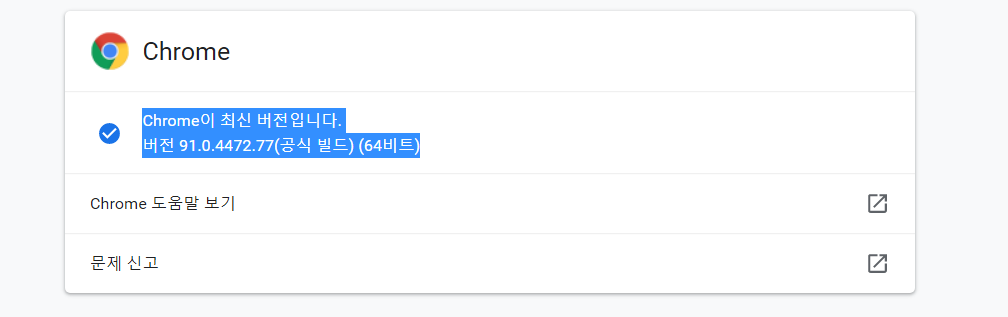

In [15]:
Image("chromeversion.png")


In [16]:
#! conda install -c conda-forge tqdm


In [17]:
naver_news_title = []
naver_news_content = []

# tqdm_notebook
for n in tqdm_notebook(range(len(naver_news_link))):
    #print(n)
    news_page_title = []
    news_page_content = []
    
    for idx in tqdm_notebook(range(len(naver_news_link[n]))):
        
        
    ########### 긁어온 URL로 접속하기 ############    
        try:
            driver.get(naver_news_link[n][idx])
            print(naver_news_link[n][idx])
            
        except:
            print("Timeout!")
            continue
        
        
        try:
            response = driver.page_source
            
        #except UnexpectedAlertPresentExcepion:     
        except:
            #driver.switch_to_alert().accept()
            print("게시글이 삭제된 경우입니다.")
            continue
        
        soup = BeautifulSoup(response, "html.parser") 
        
# 1. BeautifulSoup가 필요한 이유
# request.text를 이용해 가져온 데이터는 텍스트형태의 html 입니다.

# 텍스트형태의 데이터에서 어떻게 원하는 html 요소에 접근할 수 있을까요?

# 이를 쉽게 할 수 있게 도와주는 녀석이 바로 "뷰티풀수프"입니다!! (이름이 특이하죠)

# 즉, 날 것의 html을 의미있는 객체로 만들어서 사용자가 요리하기 쉽게 만드는 겁니다.
        
        
        ###### 뉴스 타이틀 긁어오기 ######
        
        title = None
        
        try:
            item = soup.find('div', class_="article_info")
            title = item.find('h3', class_="tts_head").get_text()
            #print(title)

        except:
            title = "OUTLINK"
        
        #print(title)
        news_page_title.append(title)
        
        
        ###### 뉴스 본문 긁어오기 ######
        
        doc = None
        text = ""
                
        data = soup.find_all("div", {"class" : "_article_body_contents"})
        if data: #data가 가져왔으면
            for item in data:

                text = text + str(item.find_all(text=True)).strip() # 공백제거  / 인자로 전달된 문자를 String의 왼쪽과 오른쪽에서 제거한다
                text = ast.literal_eval(text) # literal_eval   => AST(Abstract Syntax Trees) module 에서 제공하는 함수 / AST 모듈은 문법을 구조화 시켜주는 모듈 이다 
            #  기본 type 정도만 변환해주는 용도로 사용 가능 / text 으로 변환 해준다
                doc = ' '.join(text) # 리스트로 저장해줌
   
        else:
            doc = "OUTLINK"  
            
        news_page_content.append(doc.replace('\n', ' '))
   #replace () 함수는 첫 번째 인자를 두 번째 인자로 대체한다 .
                
    naver_news_title.append(news_page_title)
    naver_news_content.append(news_page_content)

    time.sleep(2) 
    
    
print(naver_news_title[0])
print("==================================")
print(naver_news_content[0])

<ipython-input-17-6c4fa407f4e2>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(range(len(naver_news_link))):


  0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-17-6c4fa407f4e2>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for idx in tqdm_notebook(range(len(naver_news_link[n]))):


  0%|          | 0/18 [00:00<?, ?it/s]

https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=109&aid=0004417589
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=092&aid=0002223965
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=112&aid=0003440732
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=422&aid=0000488191
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=053&aid=0000029126
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=009&aid=0004803600
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=003&aid=0010531901
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=008&aid=0004596652
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=003&aid=0010531815
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=003&aid=0010531770
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=003&aid=0010531761
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&

### 크롤링 결과 확인하기.

In [18]:
print(naver_news_title[0])

['OUTLINK', '넷기어, 뮤럴 디지털 액자 대상 프로모션 실시', 'OUTLINK', "당국, 60세 미만 잔여백신 접종 지침 번복 '혼선'", '중국의 ‘코인 죽이기’는 디지털 위안화 살리기', '매일 오르는 코인은 있어도 한주간 오른 코인은 없는 이유', '비트코인 급락에 금값은 반등…올들어 최고', 'SNT(Super-Net-Tech), 암호화폐 온라인쇼핑 플랫폼 LUS와 사업 MOU', '금융위, 암호화폐 논의 본격화…거래소 20곳 대면회의', "'5억 이상 해외 계좌 신고' 시작…숨기면 과태료 '폭탄'", "'고팍스' 운영사 스트리미, 코로나19 백신 휴가 시행", '가상자산 거래소 플라이빗, 자금세탁방지 실무 교육 실시', '상장ㆍ암호화폐 카드 출시…코인베이스 훈풍에 도지코인 급등', '금융위, 가상자산거래소와 첫 간담회…컨설팅 제공', "포블게이트, 가상자산 담보 대출 서비스 '넥스핀 2.0' 오픈", '中 가상자산 채굴 전면 퇴출?...지방정부도 압박', '"이준석 봤지?"…\'신선한 반란\'은 시작됐다', "車업계 반격에 뒤뚱거리는 '테슬라'…'소형차'로 위기 돌파?"]


In [19]:
print(naver_news_content[0])

['OUTLINK', "   본문 내용     TV플레이어     // TV플레이어     // flash 오류를 우회하기 위한 함수 추가 function _flash_removeCallback() {}    구매 후기 작성시 와이파이6 유무선공유기·증폭기 증정 (지디넷코리아=권봉석  기자) 넷기어 뮤럴 캔버스. (사진=넷기어) 넷기어가 오는 23일까지 뮤럴 디지털 액자를 최대 27% 할인판매한다. 대상 제품은 27인치 풀HD 디스플레이를 탑재한 'MC327', 21.5인치 풀HD 디스플레이를 탑재한 'MC315' 등 2종이다. 행사 기간 중 네이버 넷기어스토어를 통해 21.5인치 MC315는 27% 할인한 68만 6천200원에, 27인치 MC327은 15% 할인한 106만 2천500원에 판매한다. 두 제품 모두 전세계 미술관·박물관의 명화 등을 1년간 무제한 감상할 수 있는 뮤럴 멤버십 1년권을 기본 제공한다. 구매 후기를 남길 경우 MC327은 와이파이6 유무선 공유기 'RAX20'이나 와이파이6 증폭기 'EAX20'을 추가로 증정한다. MC315는 뮤럴 멤버십 1년권이나 와이파이5(802.11ac) 증폭기 'EX7700'을 받을 수 있다. 권봉석 기자(bskwon@zdnet.co.kr)   ▶ 지디넷코리아 '홈페이지'   ▶ 네이버 채널 구독하기 © 메가뉴스 & ZDNET, A RED VENTURES COMPANY, 무단전재-재배포 금지 \t  // 본문 내용   ", 'OUTLINK', '   본문 내용     TV플레이어      동영상 뉴스        // TV플레이어     // flash 오류를 우회하기 위한 함수 추가 function _flash_removeCallback() {}   \t \t방역 당국이 코로나 19  잔여 백신 접종 지침을 하루 새 2차례 번복하면서 혼선이 빚어졌습니다. 코로나 19  예방접종대응추진단은 어제(2일) 오후 2시  10 분 보도자료를 통해 위탁의료기관 접종은 내일(4일)부터  60 세 이상만을 대상으로 한다고

In [20]:
print(len(naver_news_title[0]))
print(len(naver_news_content[0]))

18
18


### 크롤링 결과 저장하기.

In [21]:
with open("naver_news_title.pk", "wb") as f:
    pickle.dump(naver_news_title, f)
    
with open("naver_news_content.pk", "wb") as f:
    pickle.dump(naver_news_content, f)

'w' - 쓰기용으로 파일 열기

'r' - 읽기용으로 파일 열기

ex) f = open('myfile.txt','w') #파일 열기

   f.write('my text..') # 파일 쓰기
    
   f.close() #파일 닫기

파일을 열 때는 기본적으로 with 문을 통해 open() 내장 함수를 호출하는 것이 권장됩니다. with 문을 사용하지 않을 경우, 파일 닫기를 스스로 해줘야 해서 불필요하게 코드가 지저분해지기 때문입니다.

    